<a href="https://colab.research.google.com/github/Zakaal/machine-learning_24-25/blob/main/week3/tugas_praktikum_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TUGAS PRAKTIKUM

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Impor library yang digunakan**

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler


**Impor dataset**

In [32]:
data = pd.read_csv('/content/drive/MyDrive/machine-leaning/pertemuan-3/dataset/insurance.csv')

**Pahami Data**

In [33]:
# mengecek ukuran data
data.shape

# informasi tentang data
data.info()

# deskripsi data
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


**Encoding Data**

In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['sex'] = le.fit_transform(data['sex'])
data['smoker'] = le.fit_transform(data['smoker'])
data['region'] = le.fit_transform(data['region'])

data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


**Visualisasi data**

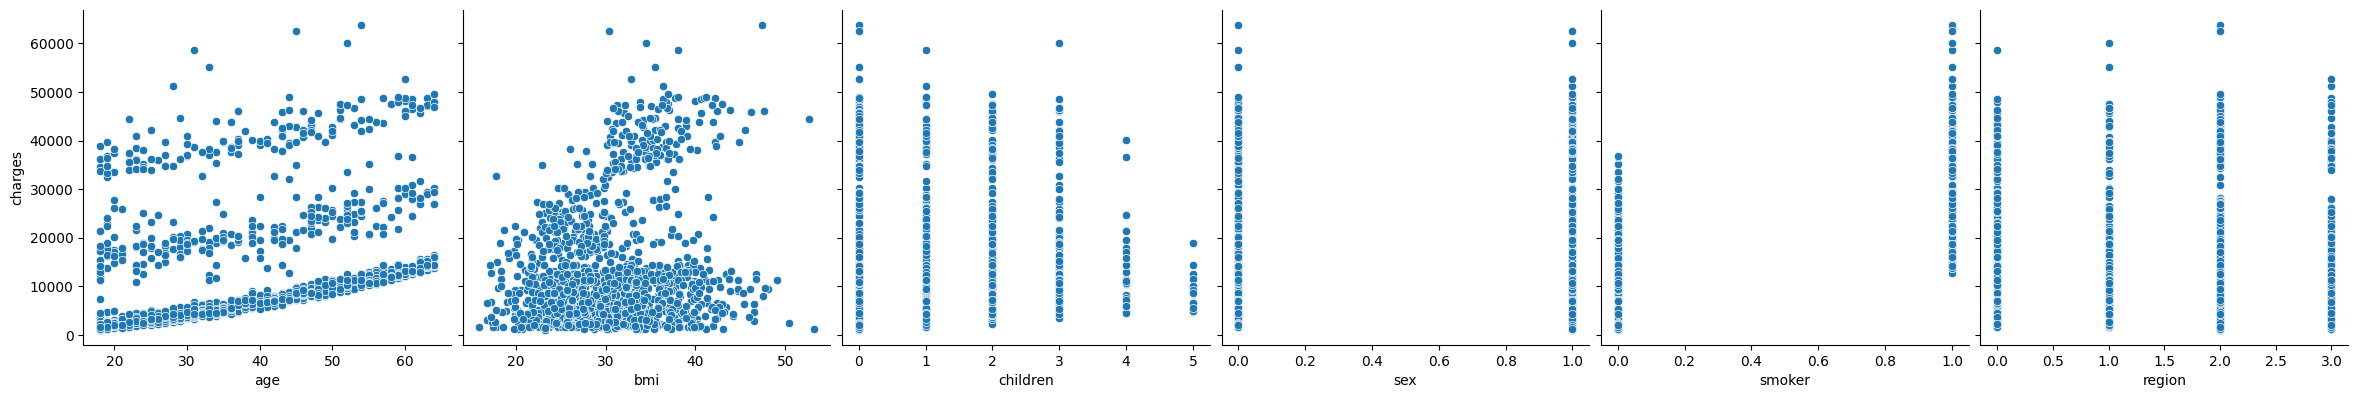

In [41]:
sns.pairplot(data, x_vars=['age', 'bmi', 'children', 'sex', 'smoker', 'region'], y_vars='charges', height=4, aspect=1, kind='scatter')



<Axes: >

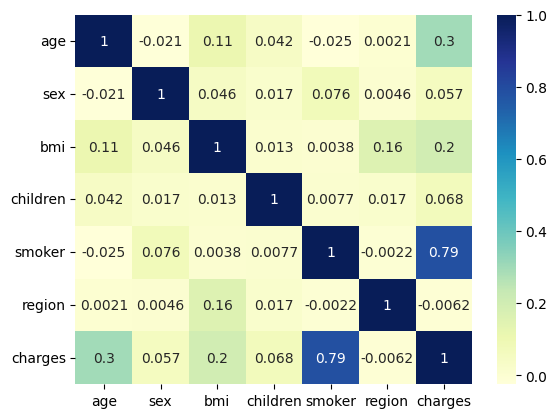

In [42]:
sns.heatmap(data.corr(), annot=True, cmap='YlGnBu')

**Jawaban :**

1. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).

In [43]:
# Identifikasi variabel bebas (fitur) dan variabel target (biaya medis personal)
X = data[['age', 'bmi', 'children', 'smoker']]
y = data['charges']

2. Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.

In [44]:
# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

3. Lakukan feature scaling jika diperlukan.

In [45]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

4. Buat model multiple linear regression menggunakan Scikit-Learn.

In [46]:
model = LinearRegression()

5. Latih model pada data latih dan lakukan prediksi pada data uji.

In [56]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

6. Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.

In [59]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)

mae = mean_absolute_error(y_test, y_pred)

print("Evaluasi Model:")
print("R-squared:", r2)
print("MSE:", mse)
print("MAE:", mae)


Evaluasi Model:
R-squared: 0.7811147722517887
MSE: 33981653.95019775
MAE: 4213.798594527246


Dataset Insurance:
Dataset ini berisi informasi tentang biaya asuransi kesehatan individu.
Variabel-variabel yang relevan:
- age: Usia
- sex: Jenis
- bmi: Indeks Massa Tubuh
- children: Jumlah anak yang ditanggung
- smoker: Perokok atau bukan 
- region: Tempat tinggal.
- charges: Biaya asuransi .


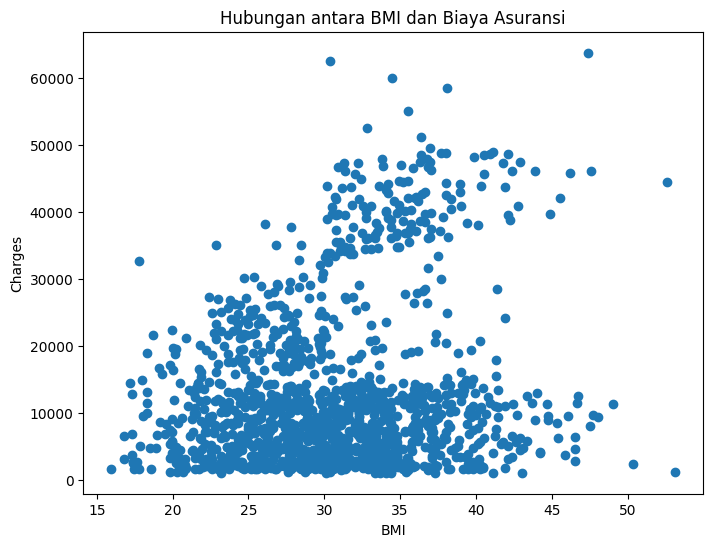

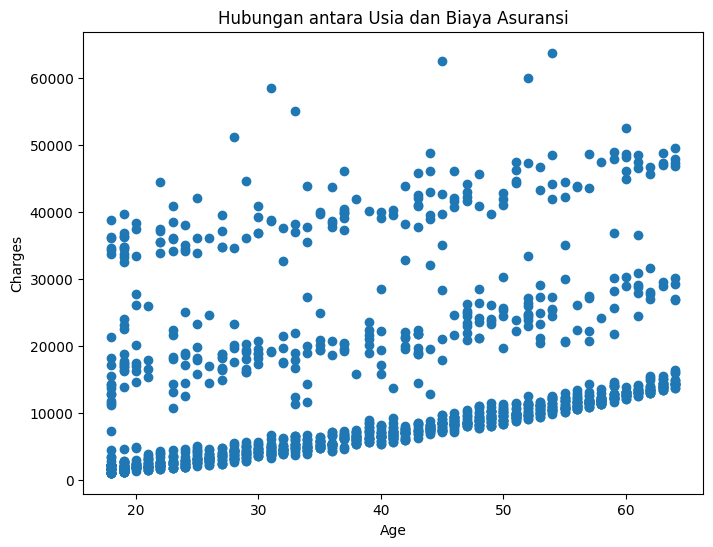


Hasil:
Model yang digunakan pada praktikum kali inin adalah multiple linear regression yang telah dilatih untuk memprediksi biaya asuransi kesehatan
Nilai R-squared yang diperoleh adalah: 0.7811147722517887
Nilai R-squared menunjukkan seberapa baik model dapat menjelaskan variasi dalam data. 
Nilai R-squared mendekati 1 menunjukkan bahwa model dapat menjelaskan sebagian besar variasi dalam data
Variabel 'smoker' dan 'bmi' tampaknya memiliki pengaruh yang signifikan terhadap biaya asuransi.


In [62]:
print("Dataset Insurance:")
print("Dataset ini berisi informasi tentang biaya asuransi kesehatan individu.")
print("Variabel-variabel yang relevan:")
print("- age: Usia")
print("- sex: Jenis")
print("- bmi: Indeks Massa Tubuh")
print("- children: Jumlah anak yang ditanggung")
print("- smoker: Perokok atau bukan ")
print("- region: Tempat tinggal.")
print("- charges: Biaya asuransi .")

plt.figure(figsize=(8, 6))
plt.scatter(data['bmi'], data['charges'])
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('Hubungan antara BMI dan Biaya Asuransi')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(data['age'], data['charges'])
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Hubungan antara Usia dan Biaya Asuransi')
plt.show()

print("\nHasil:")
print("Model yang digunakan pada praktikum kali inin adalah multiple linear regression yang telah dilatih untuk memprediksi biaya asuransi kesehatan")
print("Nilai R-squared yang diperoleh adalah:", r2)
print("Nilai R-squared menunjukkan seberapa baik model dapat menjelaskan variasi dalam data. \nNilai R-squared mendekati 1 menunjukkan bahwa model dapat menjelaskan sebagian besar variasi dalam data")
print("Variabel 'smoker' dan 'bmi' tampaknya memiliki pengaruh yang signifikan terhadap biaya asuransi.")
